## Final Project Submission

Please fill out:
* Student name: Kanwal Arora
* Student pace: self paced / part time / full time: Part Time
* Scheduled project review date/time:  
* Instructor name: Eli
* Blog post URL:


In [2]:
#importing required libraries and setting matplotlib to inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
import sklearn.linear_model as lm
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from statsmodels.formula.api import ols

%matplotlib inline

In [3]:
#Fetching Values from dataset
df = pd.read_csv('kc_house_data.csv')

## Scrubbing the Data

#### Now we will clean the data to enable us to create our model without errors. First we will drop the 'id', 'date', 'lat', 'long', and 'zipcode' columns as they will not be needed. We will then inspect the dataframe and address the columns will null or missing values.


In [4]:
#dropping id and date columns
df.drop(['id', 'date', 'lat', 'long', 'zipcode'], axis=1, inplace=True)

In [5]:
#viewing the first 15 rows
df.head(15)

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0    221900.0         3       1.00         1180      5650     1.0         NaN   
1    538000.0         3       2.25         2570      7242     2.0         0.0   
2    180000.0         2       1.00          770     10000     1.0         0.0   
3    604000.0         4       3.00         1960      5000     1.0         0.0   
4    510000.0         3       2.00         1680      8080     1.0         0.0   
5   1230000.0         4       4.50         5420    101930     1.0         0.0   
6    257500.0         3       2.25         1715      6819     2.0         0.0   
7    291850.0         3       1.50         1060      9711     1.0         0.0   
8    229500.0         3       1.00         1780      7470     1.0         0.0   
9    323000.0         3       2.50         1890      6560     2.0         0.0   
10   662500.0         3       2.50         3560      9796     1.0         NaN   
11   468000.0         2       1.00         1160      6000     1.0         0.0   
12   310000.0         3       1.00         1430     19901     1.5         0.0   
13   400000.0         3       1.75         1370      9680     1.0         0.0   
14   530000.0         5       2.00         1810      4850     1.5         0.0   

    view  condition  grade  sqft_above sqft_basement  yr_built  yr_renovated  \
0    0.0          3      7        1180           0.0      1955           0.0   
1    0.0          3      7        2170         400.0      1951        1991.0   
2    0.0          3      6         770           0.0      1933           NaN   
3    0.0          5      7        1050         910.0      1965           0.0   
4    0.0          3      8        1680           0.0      1987           0.0   
5    0.0          3     11        3890        1530.0      2001           0.0   
6    0.0          3      7        1715             ?      1995           0.0   
7    NaN          3      7        1060           0.0      1963           0.0   
8    0.0          3      7        1050         730.0      1960           0.0   
9    0.0          3      7        1890           0.0      2003           0.0   
10   0.0          3      8        1860        1700.0      1965           0.0   
11   0.0          4      7         860         300.0      1942           0.0   
12   0.0          4      7        1430           0.0      1927           NaN   
13   0.0          4      7        1370           0.0      1977           0.0   
14   0.0          3      7        1810           0.0      1900           0.0   

    sqft_living15  sqft_lot15  
0            1340        5650  
1            1690        7639  
2            2720        8062  
3            1360        5000  
4            1800        7503  
5            4760      101930  
6            2238        6819  
7            1650        9711  
8            1780        8113  
9            2390        7570  
10           2210        8925  
11           1330        6000  
12           1780       12697  
13           1370       10208  
14           1360        4850

In [6]:
#checking value in sqft_basement
df.sqft_basement.value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
1770.0        1
1481.0        1
1284.0        1
2300.0        1
3000.0        1
Name: sqft_basement, Length: 304, dtype: int64

#### There appears to be some values of '?' in sqft_basement. We will replace these with the column mean.

In [7]:
#replacing missing data in sqft_basement with column mean
sqft_basement_numerical = df.sqft_basement[df.sqft_basement != '?']
sqft_basement_numerical = sqft_basement_numerical.astype(float)
sqft_basement_numerical_mean = round(sqft_basement_numerical.mean(),1)
df['sqft_basement'] = (df['sqft_basement'].map(lambda x: sqft_basement_numerical_mean if x == '?' else x)).astype(float)

In [8]:
#checking for null values
df.isna().sum()

price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
sqft_living15       0
sqft_lot15          0
dtype: int64

#### The 'view', 'waterfront', and 'yr_renovated' columns all have null values. We will assume that those homes had no views, are not waterfront, and/or were not renovated and fill those null values with 0.

In [9]:
#replacing null values in waterfront with 0
df['view'] = df['view'].fillna(0)
df['waterfront'] = df['waterfront'].fillna(0)
df['yr_renovated'] = df['yr_renovated'].fillna(0)

#### Now before we modify any of the columns we will create a copy of the dataframe to give us an unaltered version to run models on later for comparison.

In [10]:
#creating copy of df before transformations
df_original = df.copy()

## Exploring the Data

#### For this section, we will begin by inspecting the histogram of each variable to look at the distributions and skew.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10b26cda0>,
      dtype=object)

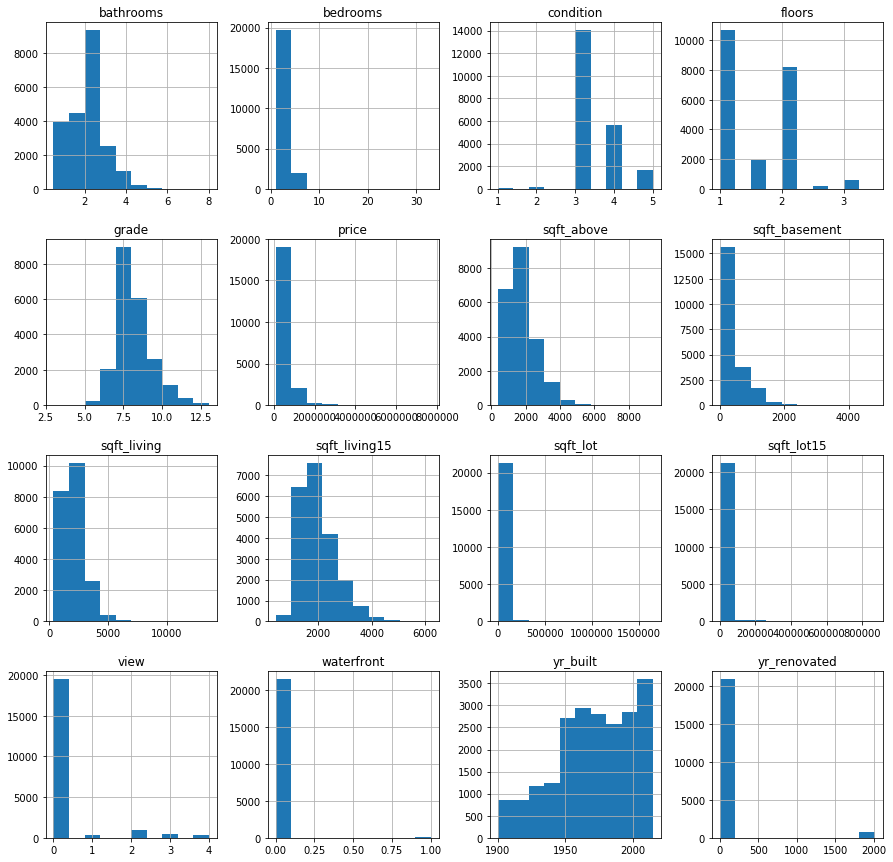

In [11]:
#intial histogram of all variables
df.hist(figsize=(15,15))

#### An initial observation of the histograms reveals that nearly none of the variables exhibit a normal distribution and there are outliers in many of the variables. To address these issues, we will iterate through each variable and perform adjustments and transformations in order to give us a more normal distribution.

In [12]:
#checking bedrooms for outliers
df.bedrooms.value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

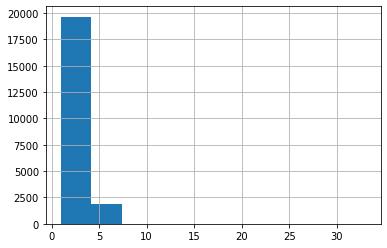

In [13]:
#histogram before removal of outliers
df.bedrooms.hist()

In [14]:
#removing outliers
df.drop(df.index[df['bedrooms'] >= 8], inplace=True)

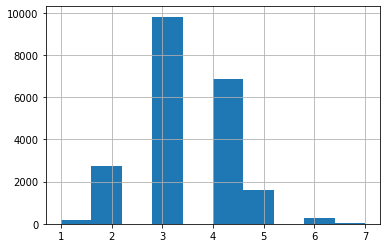

In [15]:
#histogram after removal of outliers
df.bedrooms.hist()

#### The 'bedrooms' column had some outliers so all homes with more than 7 bedrooms were removed from the dataframe. The number of homes removed was 24 which represents an insignificant percentage of our total data so removing them should not significantly impact the final model.

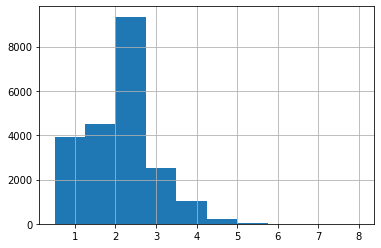

In [17]:
#bathrooms histogram
df.bathrooms.hist()

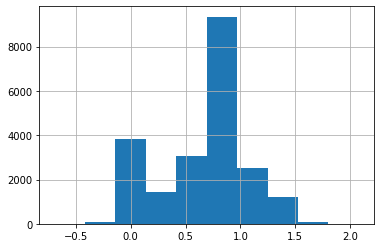

In [18]:
#using log transformation on bathrooms
(np.log(df.bathrooms)).hist()

In [19]:
#transforming bathrooms
df.bathrooms = np.log(df.bathrooms)

#### The 'bathrooms' column showed a negatively skewed distribution so we transformed it using a log transformation as the data now exhibits a more normal distribution.

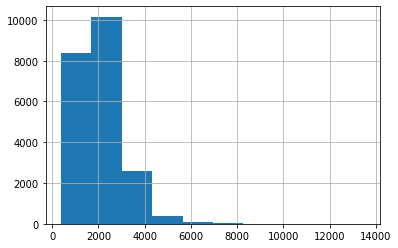

In [20]:
#sqft_living histogram
df.sqft_living.hist()

In [21]:
#checking count of outliers
print(len(df[df.sqft_living > 8000]))
print(len(df[df.sqft_living > 6000]))
print(len(df[df.sqft_living > 4000]))

9
67
773


In [22]:
#removing outliers
df.drop(df.index[df['sqft_living'] > 4000], inplace=True)

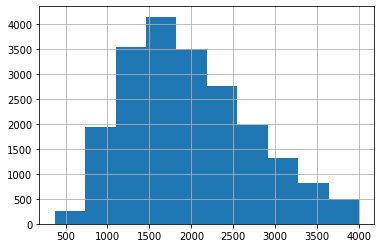

In [23]:
#histogram after removal of outliers
df.sqft_living.hist()

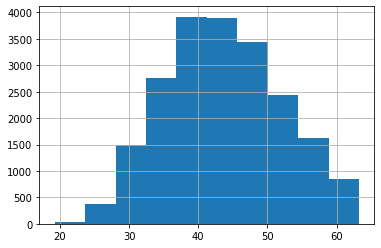

In [24]:
#histogram of square root transformed sqft_living
(np.sqrt(df.sqft_living)).hist()

In [25]:
#square root transformation on sqft_living
df.sqft_living = np.sqrt(df.sqft_living)

#### The 'sqft_living' column had some significant outliers. Homes with more than 4000 square feet were removed which was a little over 800 entries. The histogram of the modified data still showed some negative skew so we then performed a square root transformation thus giving us a more normal distribution.


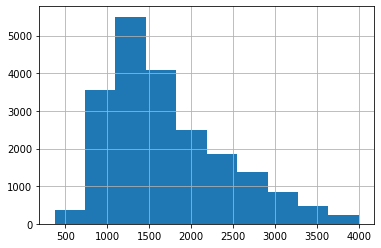

In [26]:
#sqft_above histogram
df.sqft_above.hist()

In [27]:
#square root transformation
df.sqft_above = np.sqrt(df.sqft_above)

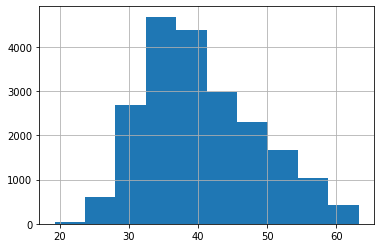

In [28]:
#square root transformed histogram
df.sqft_above.hist()

#### The 'sqft_above' column showed a negative skew so we transformed it using a square root transformation to make the distribution more normal.

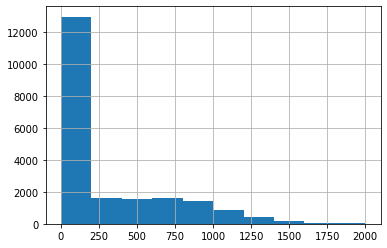

In [29]:
#sqft_basement histogram
df.sqft_basement.hist()

In [30]:
#creating new column that declares whether or not a home has a basement
df['basement'] = df.apply(lambda row: 0 if row.sqft_basement == 0 else 1, axis=1)

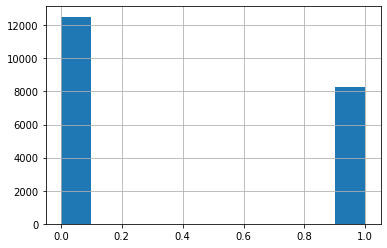

In [31]:
#new binary basement histogram
df.basement.hist()

#### The 'sqft_basement' column has a lot of values of 0 which heavily skews the distribution. By creating a new column 'basement' which is binary in nature and declares whether or not a home has a basement, we will better be able to see how this variable affects the home price later on in our model.

In [32]:
#viewing stats of yr_built
df.yr_built.describe()

count    20800.000000
mean      1970.352644
std         29.308936
min       1900.000000
25%       1951.000000
50%       1973.000000
75%       1995.000000
max       2015.000000
Name: yr_built, dtype: float64

In [33]:
#creating new column age that declares the age of the home
df['age'] = (df.yr_built.max() - df.yr_built + 1)

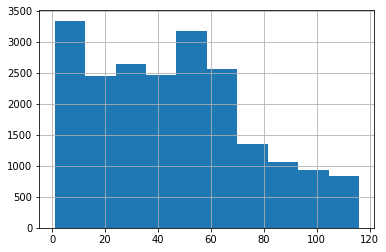

In [34]:
#histogram of new age column
df.age.hist()

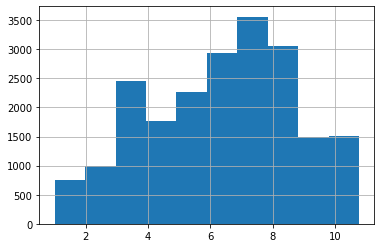

In [35]:
#square root transformation on age
df.age = np.sqrt(df.age)
df.age.hist()

In [36]:
#removal of old yr_built column
df.drop('yr_built',axis=1,inplace=True)

#### The 'yr_built' column did not make a lot of sense to have in its current state as it represents the age of the home but in terms of the year built. To remedy this we created a new column 'age' which subtracts the year the home was built from the most recent year in the data - 2015. A value of 1 was also added to the age in order to allow us to transform it without error.

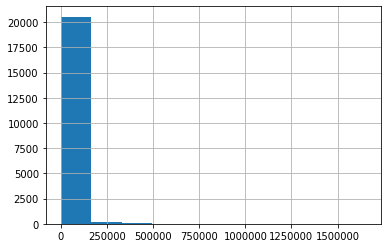

In [37]:
#sqft_lot histogram
df.sqft_lot.hist()

In [38]:
#checking number of outliers
len(df[df.sqft_lot>200000])

213

In [39]:
#removal of outliers
df.drop(df.index[df['sqft_lot'] > 200000], inplace=True)

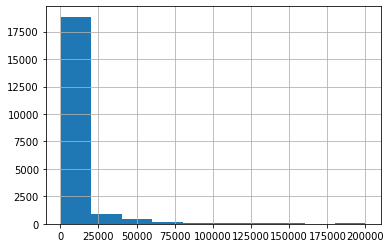

In [40]:
#histogram after removal of outliers
df.sqft_lot.hist()

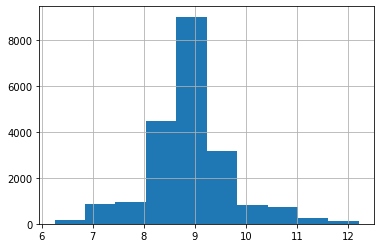

In [41]:
#log transformation of sqft_lot
df.sqft_lot = np.log(df.sqft_lot)
df.sqft_lot.hist()

#### For the 'sqft_lot' column, we first had to remove some of the outliers (213 values) and then performed a log transformation on the data to normalize the distribution.


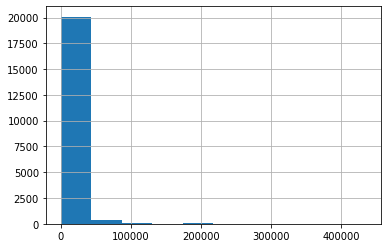

In [42]:
#histogram of sqft_lot15
df.sqft_lot15.hist()

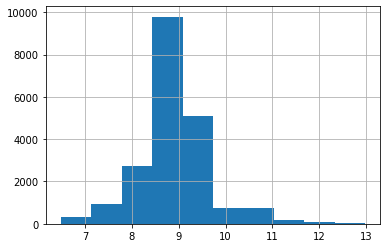

In [43]:
#log transformed sqft_lot15
df.sqft_lot15 = np.log(df.sqft_lot15)
df.sqft_lot15.hist()

#### Similarly to the 'sqft_lot' column, we performed a log transformation on the 'sqft_lot15' column to normalize the distribution.

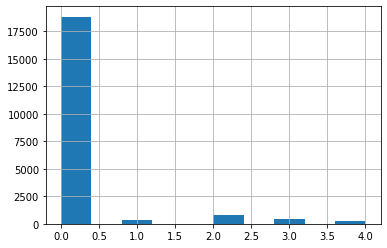

In [44]:
#view histogram
df.view.hist()

In [45]:
#unique values of view
df.view.unique()

array([0., 3., 4., 2., 1.])

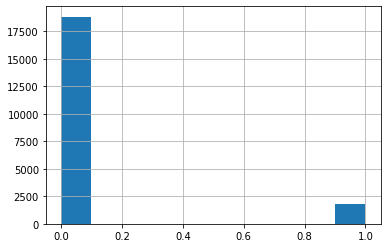

In [46]:
#converting all view values above 0 to 1 to signify that the home has been viewed
df['viewed'] = df.view
i = 4
while i > 0:
    df.viewed = df.viewed.replace(i, 1)
    i -= 1
df.viewed.hist()

#### The 'view' column only contains values 0, 1, 2, 3 and 4 with most of the values being 0. To better represent this data, an additional column was added which tells us whether or not a home was view, represented by a 1 or 0.

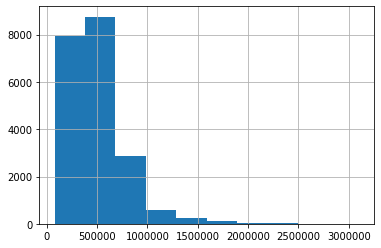

In [47]:
#price histogram
df.price.hist()

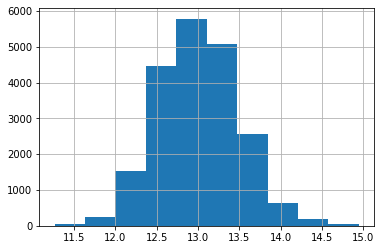

In [48]:
#log transformation on price
df['price_log'] = np.log(df.price)
df.price_log.hist()

#### Finally, we perform a log transformation on our dependent variable 'price' in order to normalize its distribution.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c241bacc0>,
      dtype=object)

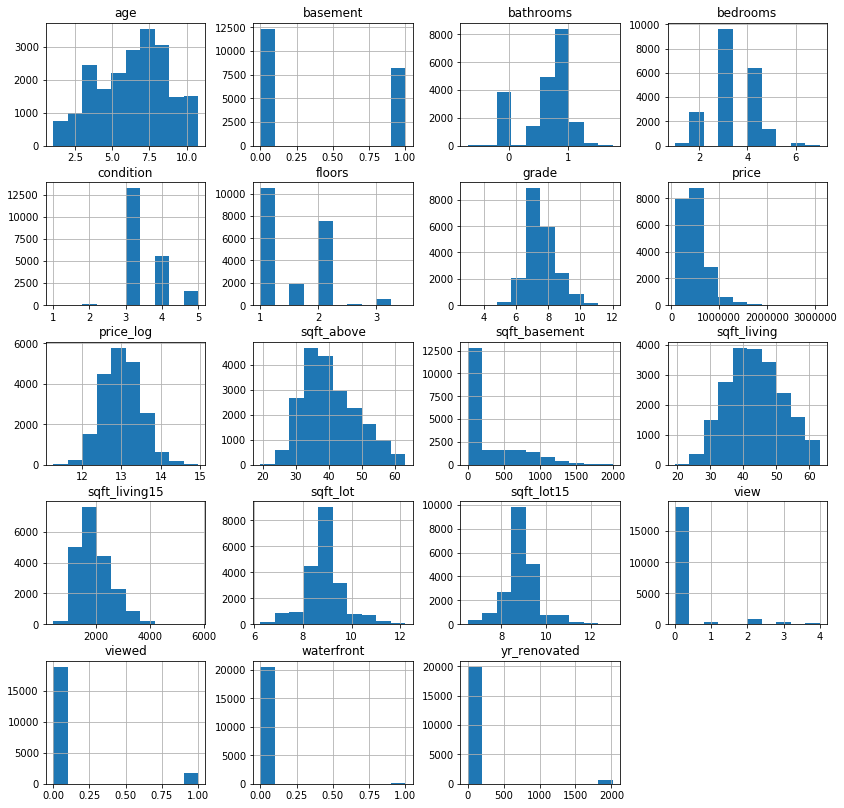

In [49]:
#updated histogram of all variables after transformations and adjustments
df.hist(figsize=(14,14))

#### Above we can see all of the updated histograms for our variables. Many of the distributions are now normal apart from our created binary columns and their original counterparts.


## Model the Data

#### Now it is time to create a model for our data. We will be using the function 'stepwise_selection' below to rank the predictors of our data on their contribution to the model and to find the best number of predictors to use.


In [50]:
#stepwise selection function
import statsmodels.api as sm

def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

#### We will now split our data into a train and test set using an initial test size of 0.25. We will then use the stepwise function above to do an interative feature selection for all of the independent variables. For each iteration, one more predictor will be selected and added, and in addition, a repeated k-fold with 3 splits and 10 repeats will be ran to cross validate the R-squared value and % difference in MSE between the train and test set for each regression. Then, by graphing a plot of our predicted y-values vs the actual y-values and comparing the R-squared values and % differences in MSE, we should be able to decide which predictors to include in our model of best fit.


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


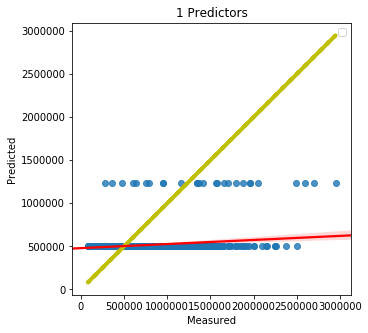

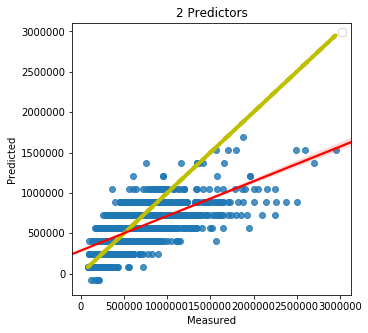

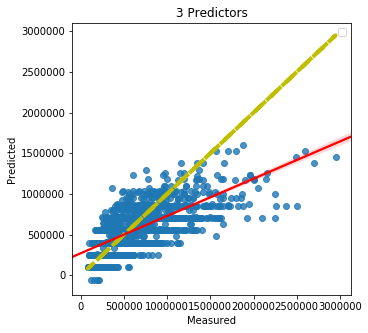

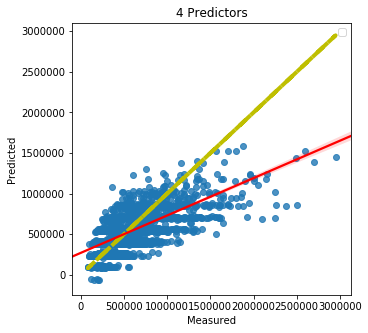

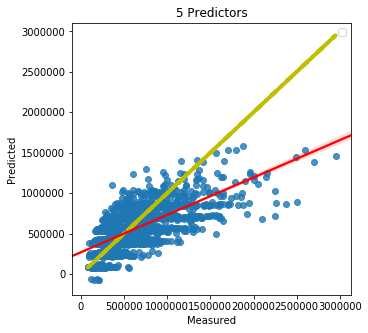

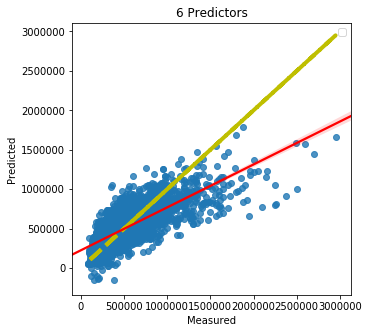

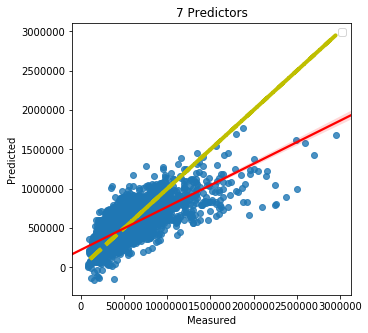

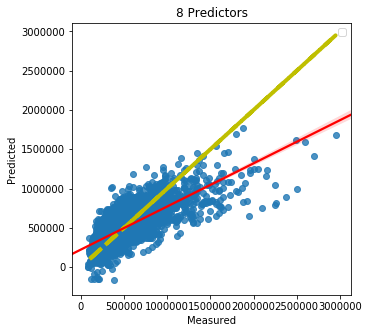

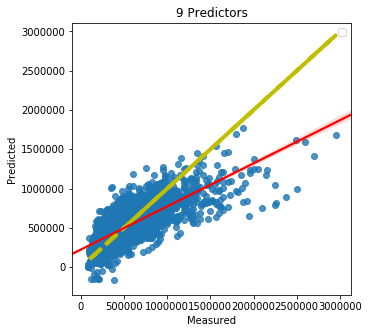

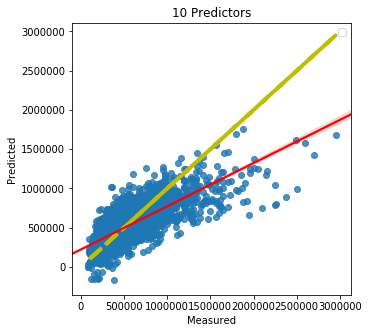

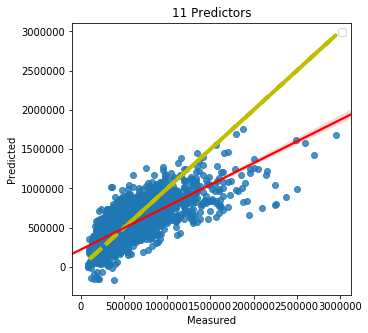

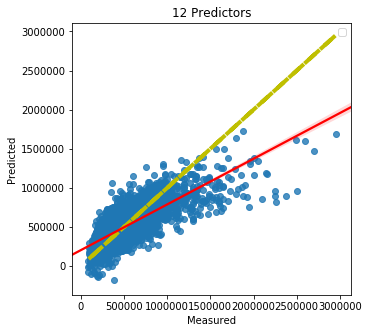

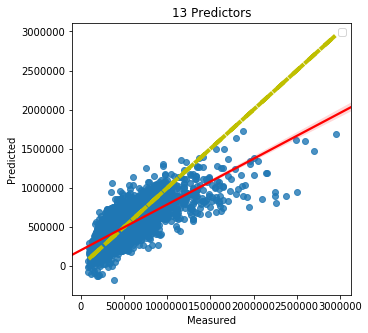

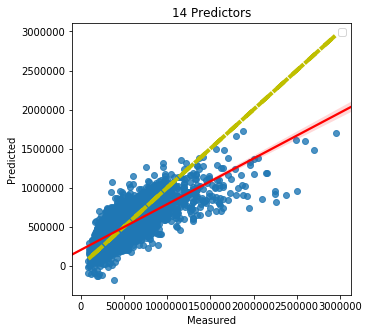

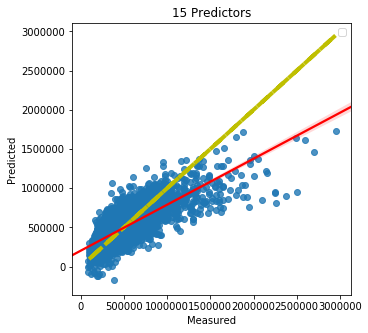

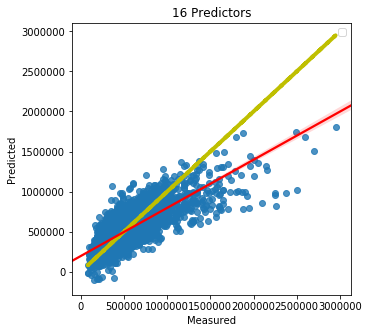

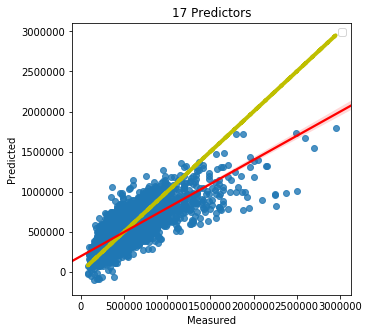

# Predictors  R-squared  MSE % Difference  Added Predictor
0              1   0.056778          2.397657     [waterfront]
1              2   0.438552          0.852032          [grade]
2              3   0.468010          2.275153           [view]
3              4   0.471852          2.163946      [bathrooms]
4              5   0.502580          1.729208         [floors]
5              6   0.541981          0.993599            [age]
6              7   0.550919          0.580638      [condition]
7              8   0.555629          0.476402     [sqft_lot15]
8              9   0.558263          0.380806         [viewed]
9             10   0.561765          0.260768       [bedrooms]
10            11   0.578160         -0.003382       [sqft_lot]
11            12   0.593160         -0.228657    [sqft_living]
12            13   0.595386         -0.267875       [basement]
13            14   0.596291         -0.293498     [sqft_above]
14            15   0.599252         -0.477339  [sqft_basement]
15            16   0.613704         -1.048700  [sqft_living15]
16            17   0.614463         -0.943803   [yr_renovated]

In [52]:
#RFE regression of all predictors using repeated k-fold 

#setting X, y and creating train/test split
X = df.drop(['price', 'price_log'], axis=1)
y = df.price
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=47)

#initializing counter variable 'i' and creating lists to add to over each iteration
i = 1
results_df = pd.DataFrame()
predictors = list()
reg_score = list()
mse_diffs = list()
added_pred = list()
previous_columns = []

#this loop repeats once for each column in 'df'
while i <= (int(len(df.drop(['price', 'price_log'], axis=1).columns))):
    rkf = RepeatedKFold(n_splits=3, n_repeats=10, random_state=47)
    scores = 0
    percent_diffs = 0
    
    #this loop using a repeated k-fold to generate an average R-squared and % difference in train/test MSE 
    for train_index, test_index in rkf.split(X_train):
        X_train2, X_val = X_train.iloc[train_index], X_train.iloc[test_index]
        y_train2, y_val = y_train.iloc[train_index], y_train.iloc[test_index]
        linreg = LinearRegression()
        selector = RFE(linreg, n_features_to_select = i)
        selector = selector.fit(X_train2, y_train2) 
        selected_columns = X_train2.columns[selector.support_ ]
        linreg.fit(X_train2[selected_columns],y_train2)
        scores = scores + linreg.score(X_test[selected_columns], y_test)
        y_hat_train = linreg.predict(X_train[selected_columns])
        y_hat_test = linreg.predict(X_test[selected_columns])
        train_mse = mean_squared_error(y_train, y_hat_train)
        test_mse = mean_squared_error(y_test, y_hat_test)
        mse_diff = test_mse - train_mse
        percent_diff = mse_diff/train_mse
        percent_diffs += percent_diff
        
    #adding data to lists
    predictors.append(i)
    reg_score.append(scores/30)
    mse_diffs.append(percent_diffs/30*100)
    added_pred.append(list(set(selected_columns) - set(previous_columns)))
    previous_columns = selected_columns
    predicted = linreg.predict(X_test[selected_columns])

    #creating a plot of predicted values vs actual values
    fig, ax = plt.subplots(figsize=(5,5))
    #ax.scatter(y_test, predicted, edgecolors=(0, 0, 0))
    ax.plot(y_test, y_test, 'k--', lw=4, color='y')
    sns.regplot(x=y_test, y=predicted, ax=ax, line_kws={"color": "red"})
    ax.set_xlabel('Measured')
    ax.set_ylabel('Predicted')
    ax.set_title(str(i) + " Predictors")
    ax.legend()
    i += 1
results_df['# Predictors'] = predictors
results_df['R-squared'] = reg_score
results_df['MSE % Difference'] = mse_diffs
results_df['Added Predictor'] = added_pred
plt.show()
results_df

#### From the above table, we can see that the test set MSE is anywhere from approx 1% more to 1% less than the training set MSE. This varies slightly as more predictors are added and doesn't follow a pattern unlike the R-squared values which increases with each additional predictor. Looking at the generated plots of measured vs predicted values for 'price', we can see that as more predictors are added, the predicted values approach the measured values. Based on these findings, we will use all 17 predictors in our model as that will maximize our R-squared value of the model against our test data and also will maintain a moderately low difference in MSE between the train and test set.


## Evaluate the Model

#### Now that we have our model, we can begin to ask relevant questions as to the effectiveness and fit of the model as well as address concerns and investigate possible improvements.


## Question 1

### How does our model compare to a model of the data before any of our modifications and transformations?

#### Before we started to dig into and modify our data set, we grabbed a copy of an unedited version of the data - 'df_orig'. We can run a regression on that dataset and compare the results to those of our model to answer this question. We will repeat the stepwise feature selection as we did earlier, using a repeated k-fold validation method, and plotting the predicted values vs the actual values.


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


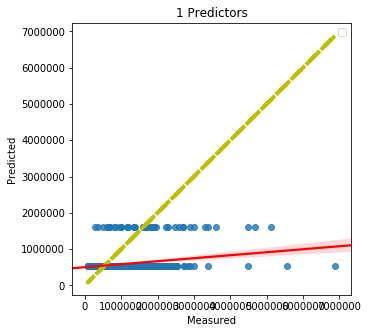

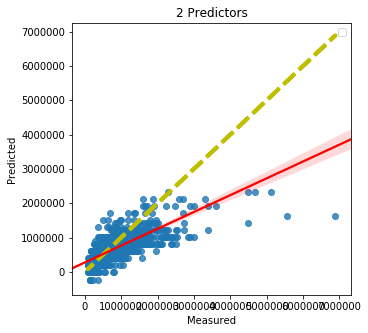

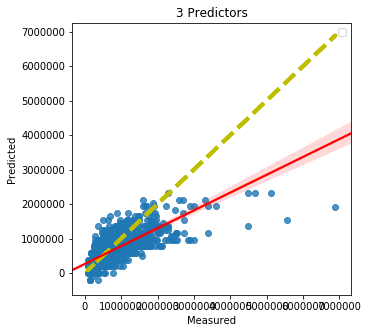

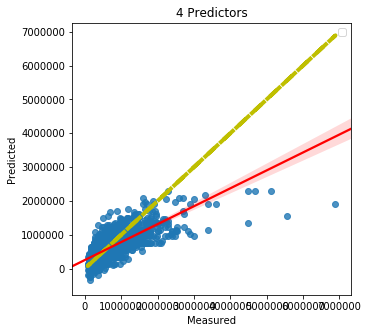

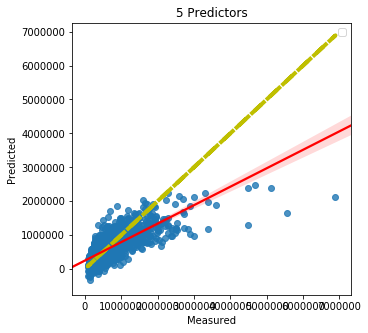

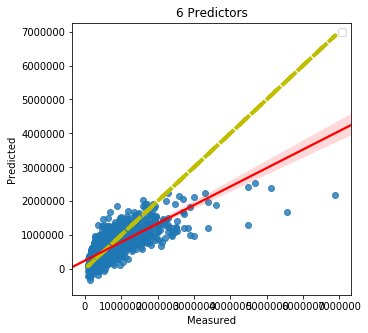

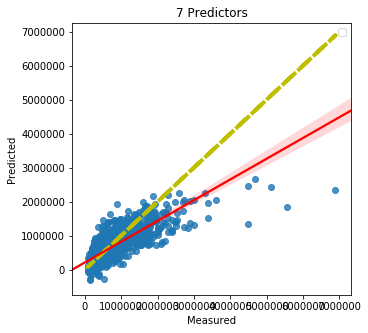

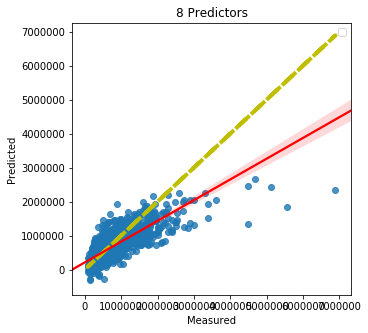

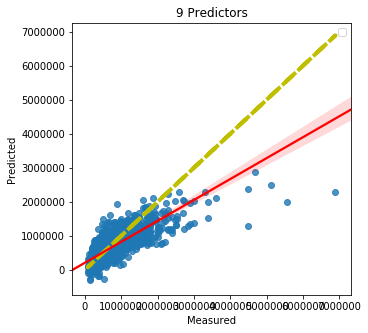

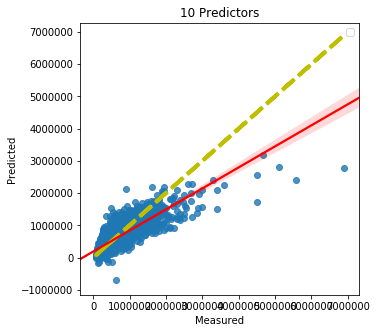

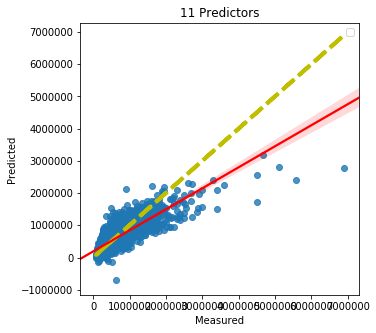

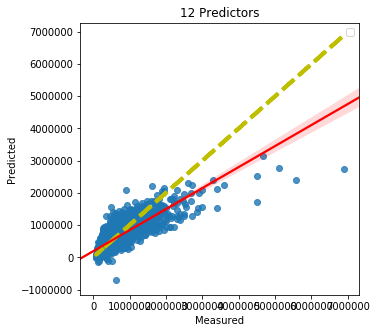

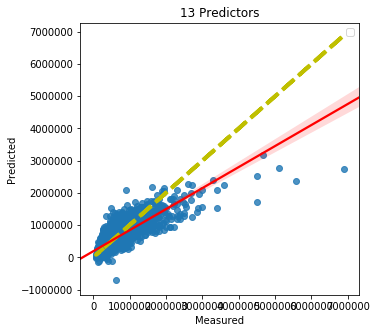

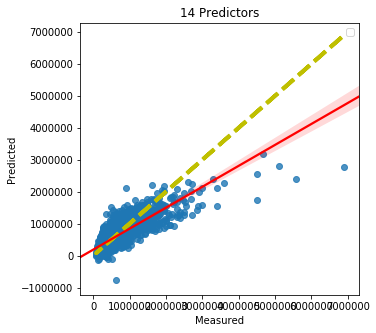

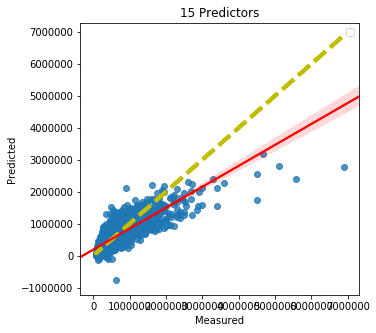

# Predictors  R-squared  MSE % Difference  Added Predictor
0              1   0.100510         -0.198471     [waterfront]
1              2   0.490020          4.409659          [grade]
2              3   0.515821          5.126805           [view]
3              4   0.525980          6.090957      [condition]
4              5   0.540883          5.089502      [bathrooms]
5              6   0.543076          5.013684         [floors]
6              7   0.600565          4.493230       [yr_built]
7              8   0.609256          4.418562       [bedrooms]
8              9   0.630056          4.366307  [sqft_basement]
9             10   0.650623          4.656122     [sqft_above]
10            11   0.650965          4.607029    [sqft_living]
11            12   0.650560          4.989960  [sqft_living15]
12            13   0.650894          4.902002   [yr_renovated]
13            14   0.652061          5.093368     [sqft_lot15]
14            15   0.652053          5.091840       [sqft_lot]

In [53]:
#RFE regression of all predictors using repeated k-fold 

#setting X, y and creating train/test split
X = df_original.drop(['price'], axis=1)
y = df_original.price
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=47)

#initializing counter variable 'i' and creating lists to add to over each iteration
i = 1
results_df_original = pd.DataFrame()
predictors = list()
reg_score = list()
mse_diffs = list()
added_pred = list()
previous_columns = []

#this loop repeats once for each column in 'df'
while i <= (int(len(df_original.drop('price', axis=1).columns))):
    rkf = RepeatedKFold(n_splits=3, n_repeats=10, random_state=47)
    scores = 0
    percent_diffs = 0
    
    #this loop using a repeated k-fold to generate an average R-squared and % difference in train/test MSE 
    for train_index, test_index in rkf.split(X_train):
        X_train2, X_val = X_train.iloc[train_index], X_train.iloc[test_index]
        y_train2, y_val = y_train.iloc[train_index], y_train.iloc[test_index]
        linreg = LinearRegression()
        selector = RFE(linreg, n_features_to_select = i)
        selector = selector.fit(X_train2, y_train2) 
        selected_columns = X_train2.columns[selector.support_ ]
        linreg.fit(X_train2[selected_columns],y_train2)
        scores = scores + linreg.score(X_test[selected_columns], y_test)
        y_hat_train = linreg.predict(X_train[selected_columns])
        y_hat_test = linreg.predict(X_test[selected_columns])
        train_mse = mean_squared_error(y_train, y_hat_train)
        test_mse = mean_squared_error(y_test, y_hat_test)
        mse_diff = test_mse - train_mse
        percent_diff = mse_diff/train_mse
        percent_diffs += percent_diff
        
    #adding data to lists
    predictors.append(i)
    reg_score.append(scores/30)
    mse_diffs.append(percent_diffs/30*100)
    added_pred.append(list(set(selected_columns) - set(previous_columns)))
    previous_columns = selected_columns
    predicted = linreg.predict(X_test[selected_columns])

    fig, ax = plt.subplots(figsize=(5,5))
    #ax.scatter(y_test, predicted, edgecolors=(0, 0, 0))
    ax.plot(y_test, y_test, 'k--', lw=4, color='y')
    sns.regplot(x=y_test, y=predicted, ax=ax, line_kws={"color": "red"})
    ax.set_xlabel('Measured')
    ax.set_ylabel('Predicted')
    ax.set_title(str(i) + " Predictors")    
    ax.legend()
    i += 1
results_df_original['# Predictors'] = predictors
results_df_original['R-squared'] = reg_score
results_df_original['MSE % Difference'] = mse_diffs
results_df_original['Added Predictor'] = added_pred
plt.show()
results_df_original

#### Comparing the regression of the data in 'df_original' to that of our model we can see that similarly, the R-squared value of the test set increases as the number of predictors increase apart from the last step in going from 13 to 14 predictors where the R-squared value slightly decreases. The R-squared of our model using 17 predictors was 0.614463 while the best R-squared of the un-transformed dataset is actually higher at 0.652061 using 13 predictors. This is interesting as based on that metric alone, the model of 'df_original' actually fits the test set slightly better on average. Conversely, however, the % difference in MSE between the train and test set is lower in our model with it being -0.943803 and for 'df_original' using 13 predictors, 5.093368.

#### When we look at the plots of predicted vs measured values, we can see that the model of 'df_original' fits the data moderately well as more predictors are added. However, the model of 'df_original' starts to do a worse job of predicting as the 'price' increases. It would appear that our model does fit the data better and is a better predictor of home prices, but to a lesser extent than would be expected. To investigate why this might be the case, we can ask further questions.


### Question 2

### Can our model be improved by addressing covariance of the predictors?

#### If multiple variables exhibit covariance with each other, our model could be affected negatively. We will check the covariance of all of our predictors and try eliminating problematic variables to see if it improves our model.


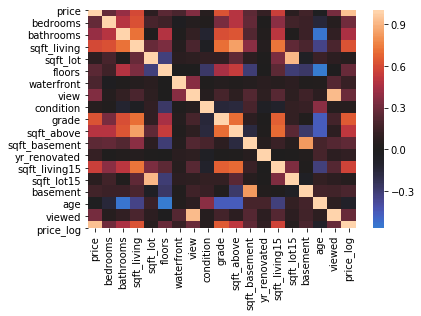

In [54]:
#heatmap to check for correlations between variables where corr > 0.75
sns.heatmap(df.corr(),center=0);

#### Some of our variables appear to be highly correlated. We will choose a threshold of 0.75 for variables with significant correlation and generate a new heatmap to more clearly show those variables.


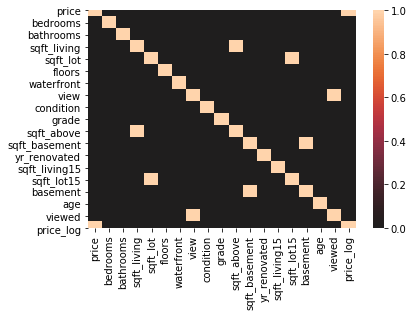

In [55]:
sns.heatmap(abs(df.corr())>0.75, center=0)

#### From the above we can see that 'sqft_above' and 'sqft_living', 'sqft_lot15' and 'sqft_lot', 'view' and 'viewed', and 'sqft_basement' and 'basement', show high correlation with each other. Out of each of these pairs, the less important ones are 'sqft_above' as the total square footage of a home is likely more significant, 'sqft_lot', 'viewed', and 'basement'. Now let's try running our regression after removing these variables.

In [56]:
#creating dataframe that will remove some of the variables with high correlation to other variables
df_adj = df.copy()
to_drop = ['view', 'sqft_lot15', 'sqft_above', 'sqft_basement']
df_adj.drop(to_drop, axis=1, inplace=True)

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


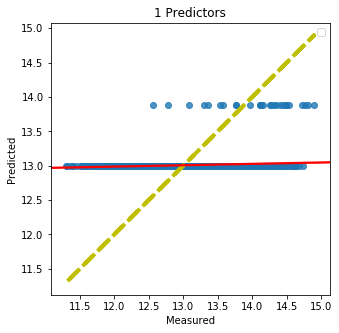

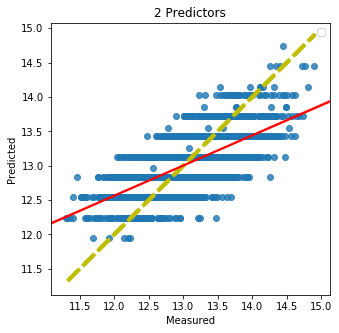

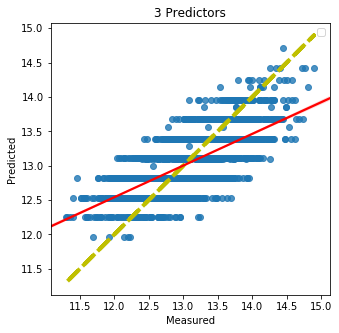

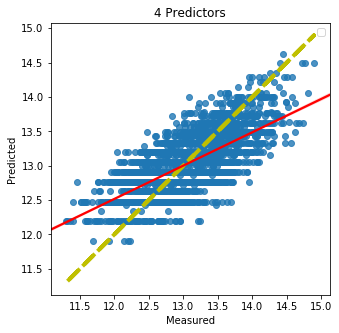

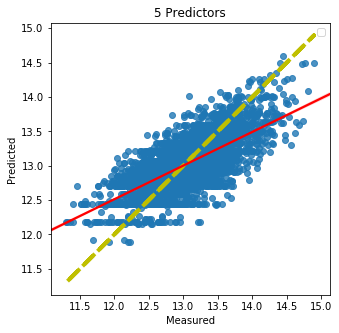

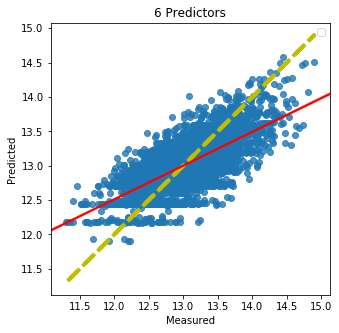

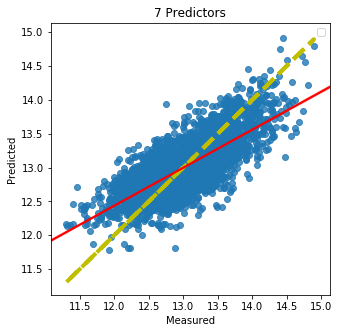

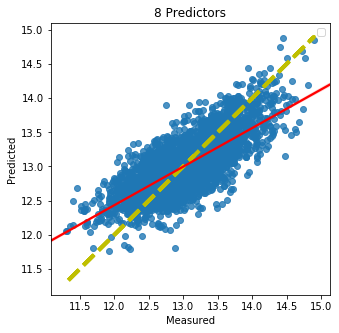

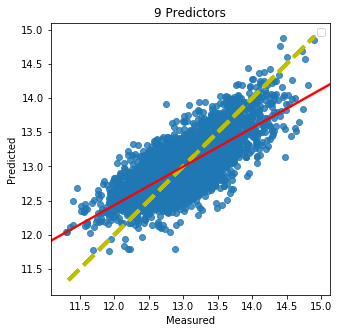

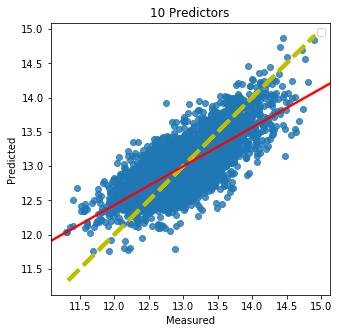

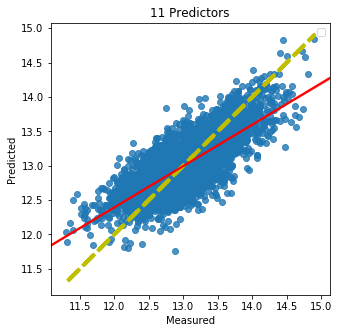

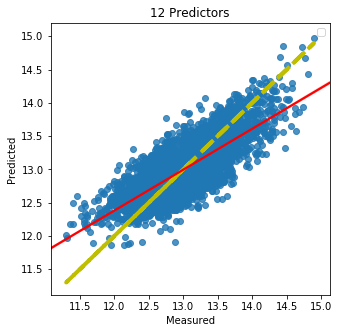

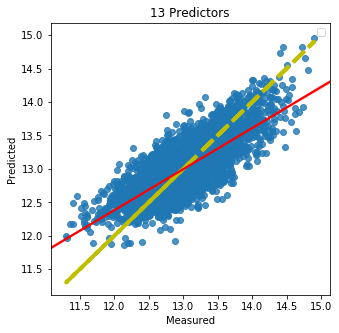

# Predictors  R-squared  MSE % Difference  Added Predictor
0              1   0.036134          2.199824     [waterfront]
1              2   0.359981          0.310695          [grade]
2              3   0.465546         -0.247919         [viewed]
3              4   0.489933         -0.641431       [basement]
4              5   0.494739         -0.898407      [bathrooms]
5              6   0.495767         -0.913714         [floors]
6              7   0.567101         -2.008907            [age]
7              8   0.569948         -2.013282      [condition]
8              9   0.570385         -2.006357       [sqft_lot]
9             10   0.571658         -2.188099       [bedrooms]
10            11   0.606146         -3.098479    [sqft_living]
11            12   0.619440         -3.508948  [sqft_living15]
12            13   0.619650         -3.433841   [yr_renovated]

In [57]:
#RFE regression of all predictors using repeated k-fold 

#setting X, y and creating train/test split
X = df_adj.drop(['price','price_log'], axis=1)
y = df_adj.price_log
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=47)

#initializing counter variable 'i' and creating lists to add to over each iteration
i = 1
results_df_adj = pd.DataFrame()
predictors = list()
reg_score = list()
mse_diffs = list()
added_pred = list()
previous_columns = []

#this loop repeats once for each column in 'df'
while i <= (int(len(df_adj.drop(['price','price_log'], axis=1).columns))):
    rkf = RepeatedKFold(n_splits=3, n_repeats=10, random_state=47)
    scores = 0
    percent_diffs = 0
    
    #this loop using a repeated k-fold to generate an average R-squared and % difference in train/test MSE 
    for train_index, test_index in rkf.split(X_train):
        X_train2, X_val = X_train.iloc[train_index], X_train.iloc[test_index]
        y_train2, y_val = y_train.iloc[train_index], y_train.iloc[test_index]
        linreg = LinearRegression()
        selector = RFE(linreg, n_features_to_select = i)
        selector = selector.fit(X_train2, y_train2) 
        selected_columns = X_train2.columns[selector.support_ ]
        linreg.fit(X_train2[selected_columns],y_train2)
        scores = scores + linreg.score(X_test[selected_columns], y_test)
        y_hat_train = linreg.predict(X_train[selected_columns])
        y_hat_test = linreg.predict(X_test[selected_columns])
        train_mse = mean_squared_error(y_train, y_hat_train)
        test_mse = mean_squared_error(y_test, y_hat_test)
        mse_diff = test_mse - train_mse
        percent_diff = mse_diff/train_mse
        percent_diffs += percent_diff
        
    #adding data to lists
    predictors.append(i)
    reg_score.append(scores/30)
    mse_diffs.append(percent_diffs/30*100)
    added_pred.append(list(set(selected_columns) - set(previous_columns)))
    previous_columns = selected_columns
    predicted = linreg.predict(X_test[selected_columns])

    fig, ax = plt.subplots(figsize=(5,5))
    #ax.scatter(y_test, predicted, edgecolors=(0, 0, 0))
    ax.plot(y_test, y_test, 'k--', lw=4, color='y')
    sns.regplot(x=y_test, y=predicted, ax=ax, line_kws={"color": "red"})
    ax.set_xlabel('Measured')
    ax.set_ylabel('Predicted')
    ax.set_title(str(i) + " Predictors")
    ax.legend()
    i += 1
results_df_adj['# Predictors'] = predictors
results_df_adj['R-squared'] = reg_score
results_df_adj['MSE % Difference'] = mse_diffs
results_df_adj['Added Predictor'] = added_pred
plt.show()
results_df_adj

#### Looking at the results of this regression, we can see that the R-squared value and % difference in MSE are approximately the same in this adjusted model as in our original model. This adjusted model is a slightly worse fit as the R-squared values are slightly lower and the % differences in MSE are slightly more. This seems to suggest that the covariance of the removed variables does not significantly affect our model's fit in a negative way. One additional thing to consider however, is our added variables of basement and viewed. Both of which are binary data columns meant to deal with both columns having a large number of 0s and then a small spread of other values. We will try running a regression simply without those two added variables to see if that makes any difference.

In [58]:
#creating dataframe that will remove some of the variables with high correlation to other variables
df_adj2 = df.copy()
to_drop = ['viewed', 'basement']
df_adj2.drop(to_drop, axis=1, inplace=True)

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


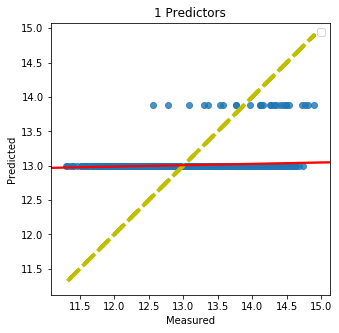

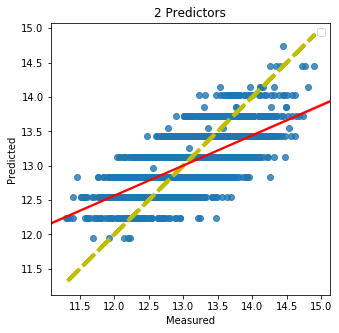

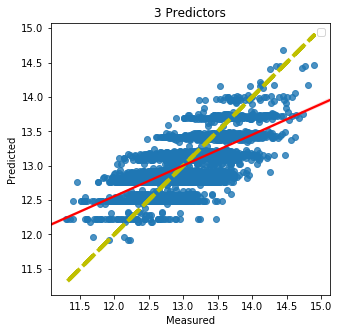

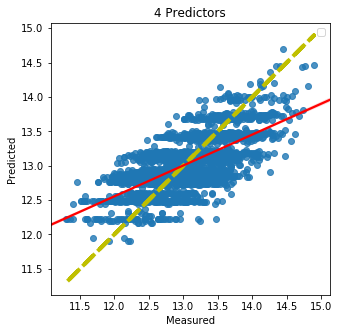

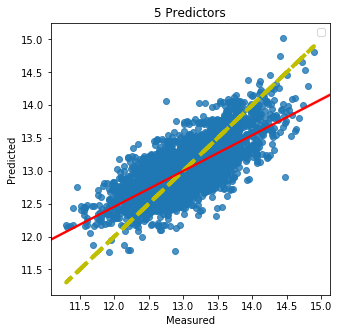

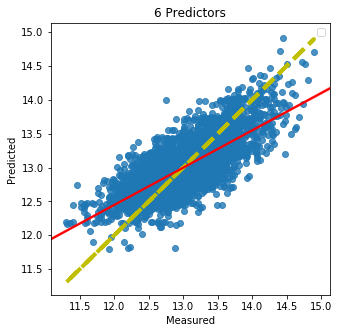

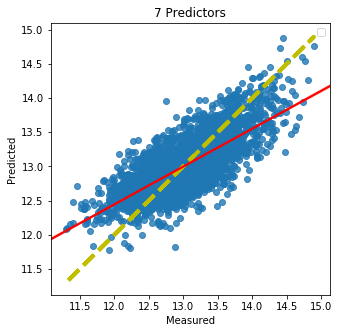

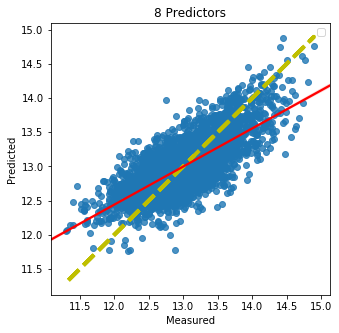

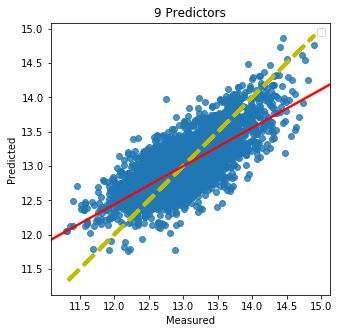

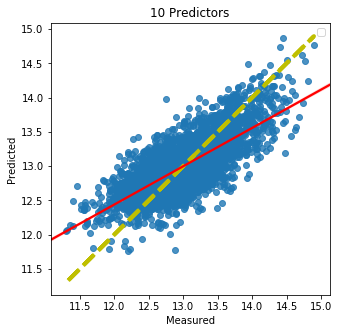

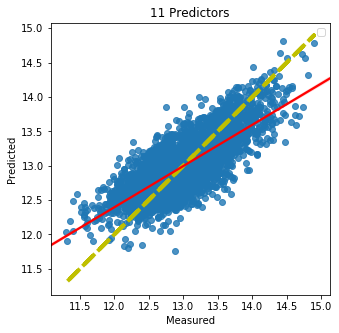

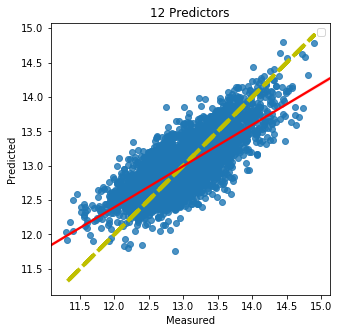

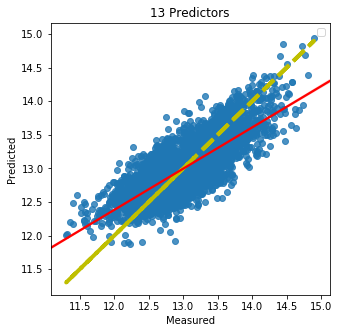

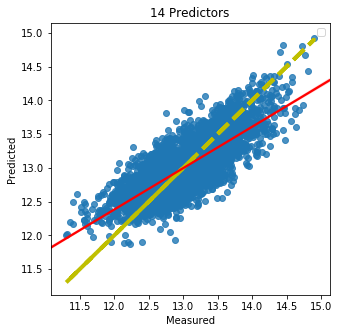

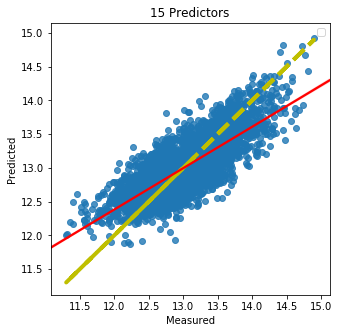

# Predictors  R-squared  MSE % Difference  Added Predictor
0              1   0.022288          2.036337     [waterfront]
1              2   0.442665         -0.313025          [grade]
2              3   0.451988         -0.735181      [bathrooms]
3              4   0.462785         -0.583648         [floors]
4              5   0.523378         -1.350915            [age]
5              6   0.557287         -1.814305           [view]
6              7   0.560180         -1.840078      [condition]
7              8   0.562740         -1.745170     [sqft_lot15]
8              9   0.564594         -1.998607       [bedrooms]
9             10   0.564573         -1.995191       [sqft_lot]
10            11   0.605012         -2.953431    [sqft_living]
11            12   0.605242         -2.977561     [sqft_above]
12            13   0.618687         -3.311335  [sqft_living15]
13            14   0.618789         -3.266214   [yr_renovated]
14            15   0.618900         -3.232481  [sqft_basement]

In [59]:
#RFE regression of all predictors using repeated k-fold 

#setting X, y and creating train/test split
X = df_adj2.drop(['price', 'price_log'], axis=1)
y = df_adj2.price_log
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=47)

#initializing counter variable 'i' and creating lists to add to over each iteration
i = 1
results_df_adj2 = pd.DataFrame()
predictors = list()
reg_score = list()
mse_diffs = list()
added_pred = list()
previous_columns = []

#this loop repeats once for each column in 'df'
while i <= (int(len(df_adj2.drop(['price', 'price_log'], axis=1).columns))):
    rkf = RepeatedKFold(n_splits=3, n_repeats=10, random_state=47)
    scores = 0
    percent_diffs = 0
    
    #this loop using a repeated k-fold to generate an average R-squared and % difference in train/test MSE 
    for train_index, test_index in rkf.split(X_train):
        X_train2, X_val = X_train.iloc[train_index], X_train.iloc[test_index]
        y_train2, y_val = y_train.iloc[train_index], y_train.iloc[test_index]
        linreg = LinearRegression()
        selector = RFE(linreg, n_features_to_select = i)
        selector = selector.fit(X_train2, y_train2) 
        selected_columns = X_train2.columns[selector.support_ ]
        linreg.fit(X_train2[selected_columns],y_train2)
        scores = scores + linreg.score(X_test[selected_columns], y_test)
        y_hat_train = linreg.predict(X_train[selected_columns])
        y_hat_test = linreg.predict(X_test[selected_columns])
        train_mse = mean_squared_error(y_train, y_hat_train)
        test_mse = mean_squared_error(y_test, y_hat_test)
        mse_diff = test_mse - train_mse
        percent_diff = mse_diff/train_mse
        percent_diffs += percent_diff
        
    #adding data to lists
    predictors.append(i)
    reg_score.append(scores/30)
    mse_diffs.append(percent_diffs/30*100)
    added_pred.append(list(set(selected_columns) - set(previous_columns)))
    previous_columns = selected_columns
    predicted = linreg.predict(X_test[selected_columns])

    fig, ax = plt.subplots(figsize=(5,5))
    #ax.scatter(y_test, predicted, edgecolors=(0, 0, 0))
    ax.plot(y_test, y_test, 'k--', lw=4, color='y')
    sns.regplot(x=y_test, y=predicted, ax=ax, line_kws={"color": "red"})
    ax.set_xlabel('Measured')
    ax.set_ylabel('Predicted')
    ax.set_title(str(i) + " Predictors")
    ax.legend()
    i += 1
results_df_adj2['# Predictors'] = predictors
results_df_adj2['R-squared'] = reg_score
results_df_adj2['MSE % Difference'] = mse_diffs
results_df_adj2['Added Predictor'] = added_pred
plt.show()
results_df_adj2

#### Again, it seems that the fit is similar in goodness to our model but slightly worse as marked by slightly higher R-squared values and slightly more % difference in MSE between the test and train sets. For this reason we will keep our model as is, including our created columns of 'basement' and 'viewed'.

### Question 3

### Can we make a better fitted model by selecting a subset of homes within a certain price range?

#### Let's begin by viewing the statistics of 'price' and its distribution.

In [60]:
df.price.describe()

count    2.058700e+04
mean     5.023165e+05
std      2.727140e+05
min      7.800000e+04
25%      3.155000e+05
50%      4.400000e+05
75%      6.150000e+05
max      3.100000e+06
Name: price, dtype: float64

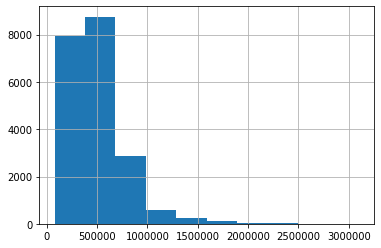

In [61]:
df.price.hist()

#### 75% of homes have a 'price' of 615,000 or less. Let's try using this as our subset and seeing how that affects our generated models.


In [63]:
df_s = df[df.price <= 615000]

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


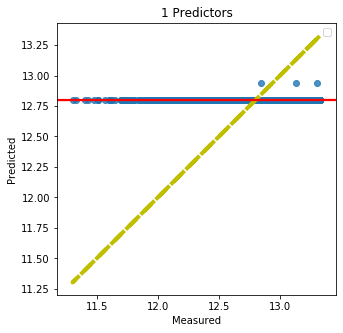

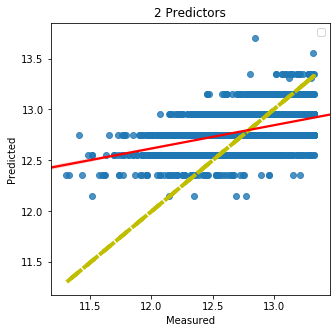

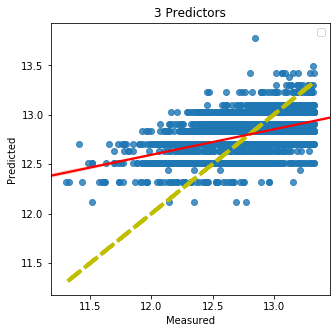

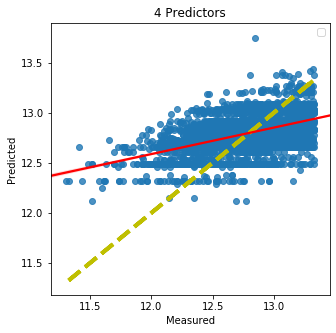

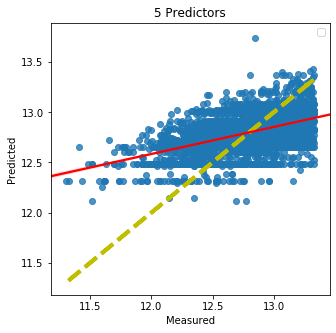

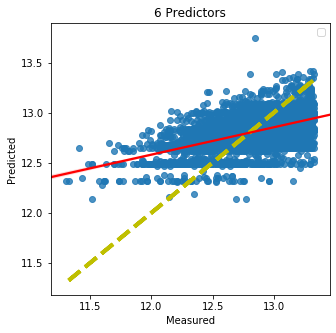

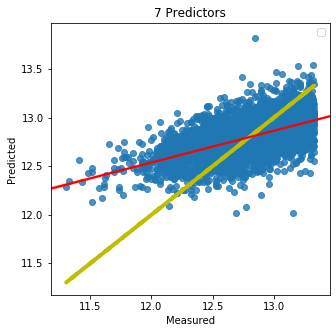

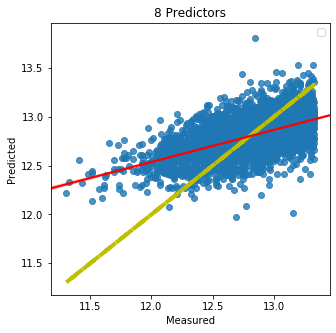

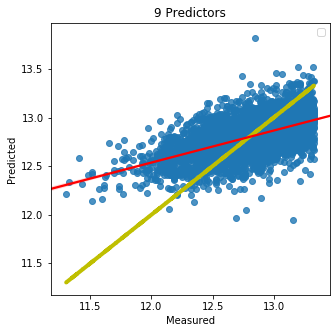

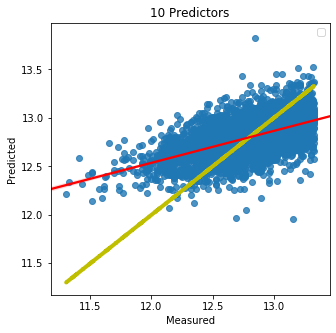

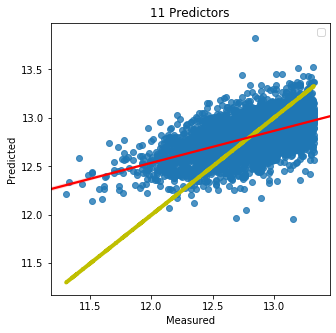

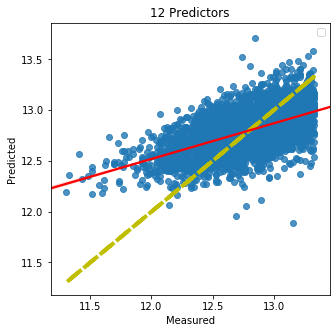

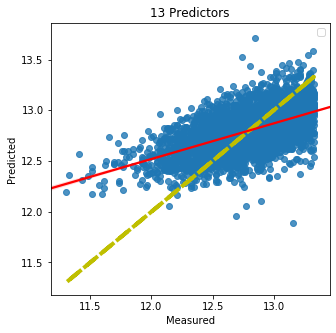

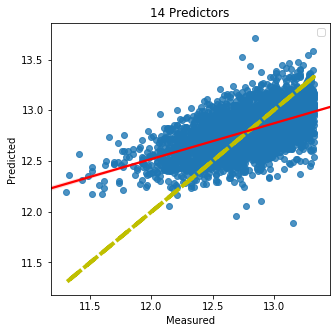

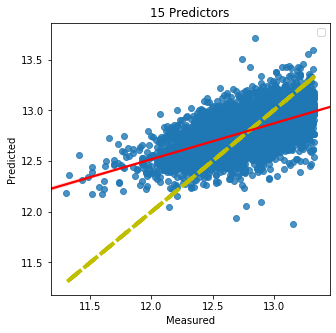

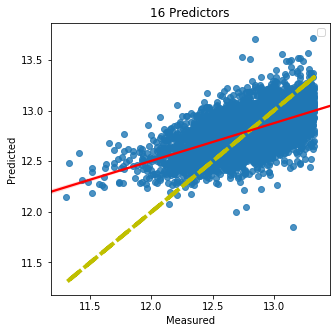

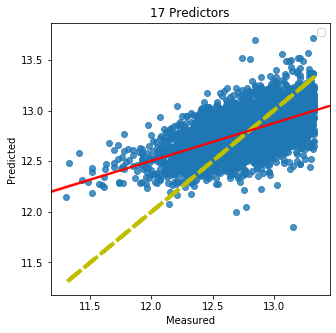

# Predictors  R-squared  MSE % Difference  Added Predictor
0              1   0.000353          0.863529     [waterfront]
1              2   0.218359          1.606698          [grade]
2              3   0.242070          2.722932       [basement]
3              4   0.248811          2.444680      [bathrooms]
4              5   0.256046          2.399513         [viewed]
5              6   0.262110          2.297609         [floors]
6              7   0.314412          1.462661            [age]
7              8   0.316001          1.407093      [condition]
8              9   0.317425          1.377129     [sqft_lot15]
9             10   0.317450          1.410740       [sqft_lot]
10            11   0.317348          1.424557       [bedrooms]
11            12   0.331993          1.410581    [sqft_living]
12            13   0.338287          1.400052     [sqft_above]
13            14   0.338279          1.403466           [view]
14            15   0.342141          1.367126  [sqft_basement]
15            16   0.353141          1.707904  [sqft_living15]
16            17   0.353192          1.696726   [yr_renovated]

In [64]:
#RFE regression of all predictors using repeated k-fold 

#setting X, y and creating train/test split
X = df_s.drop(['price', 'price_log'], axis=1)
y = df_s.price_log
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=47)

#initializing counter variable 'i' and creating lists to add to over each iteration
i = 1
results_df_s = pd.DataFrame()
predictors = list()
reg_score = list()
mse_diffs = list()
added_pred = list()
previous_columns = []

#this loop repeats once for each column in 'df'
while i <= (int(len(df_s.drop(['price', 'price_log'], axis=1).columns))):
    rkf = RepeatedKFold(n_splits=3, n_repeats=10, random_state=47)
    scores = 0
    percent_diffs = 0
    
    #this loop using a repeated k-fold to generate an average R-squared and % difference in train/test MSE 
    for train_index, test_index in rkf.split(X_train):
        X_train2, X_val = X_train.iloc[train_index], X_train.iloc[test_index]
        y_train2, y_val = y_train.iloc[train_index], y_train.iloc[test_index]
        linreg = LinearRegression()
        selector = RFE(linreg, n_features_to_select = i)
        selector = selector.fit(X_train2, y_train2) 
        selected_columns = X_train2.columns[selector.support_ ]
        linreg.fit(X_train2[selected_columns],y_train2)
        scores = scores + linreg.score(X_test[selected_columns], y_test)
        y_hat_train = linreg.predict(X_train[selected_columns])
        y_hat_test = linreg.predict(X_test[selected_columns])
        train_mse = mean_squared_error(y_train, y_hat_train)
        test_mse = mean_squared_error(y_test, y_hat_test)
        mse_diff = test_mse - train_mse
        percent_diff = mse_diff/train_mse
        percent_diffs += percent_diff
        
    #adding data to lists
    predictors.append(i)
    reg_score.append(scores/30)
    mse_diffs.append(percent_diffs/30*100)
    added_pred.append(list(set(selected_columns) - set(previous_columns)))
    previous_columns = selected_columns
    predicted = linreg.predict(X_test[selected_columns])

    fig, ax = plt.subplots(figsize=(5,5))
    #ax.scatter(y_test, predicted, edgecolors=(0, 0, 0))
    ax.plot(y_test, y_test, 'k--', lw=4, color='y')
    sns.regplot(x=y_test, y=predicted, ax=ax, line_kws={"color": "red"})
    ax.set_xlabel('Measured')
    ax.set_ylabel('Predicted')
    ax.set_title(str(i) + " Predictors") 
    ax.legend()
    i += 1
results_df_s['# Predictors'] = predictors
results_df_s['R-squared'] = reg_score
results_df_s['MSE % Difference'] = mse_diffs
results_df_s['Added Predictor'] = added_pred
plt.show()
results_df_s

#### Immediately we can see that this did not work. While the % difference in MSE is low, and lower than our original model, the R-squared value was nearly cut in half. Maybe a different subset will work. We will try both above and below the 50% mark of 440,000.

In [65]:
df_s2 = df[df.price <= 440000]

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


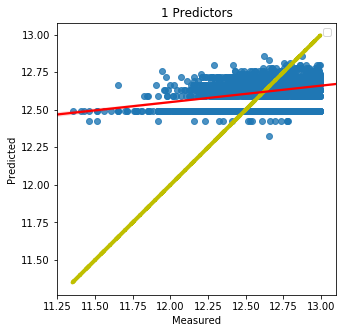

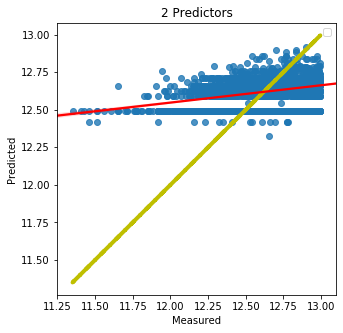

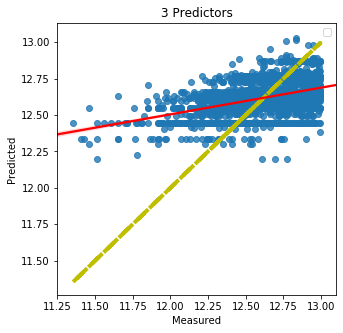

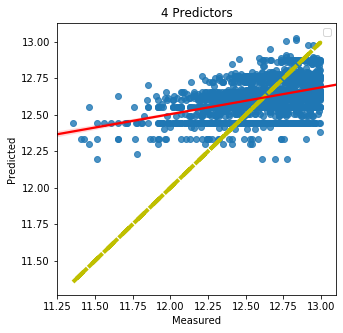

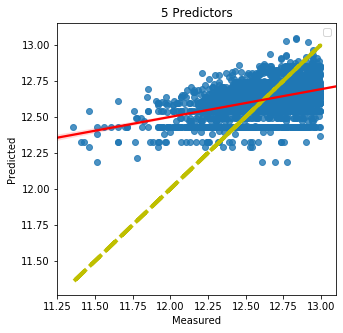

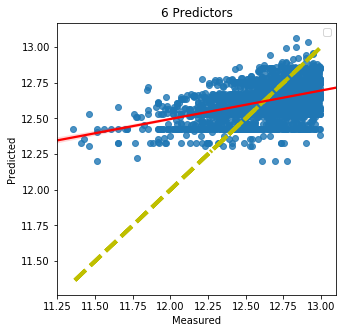

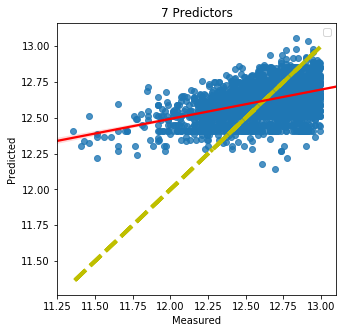

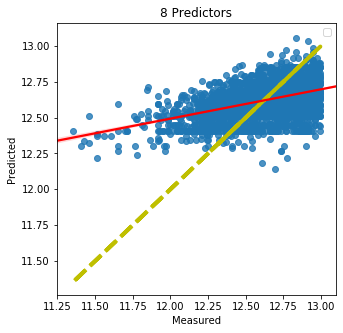

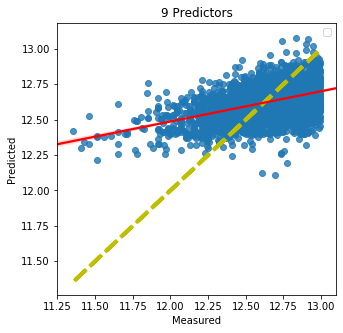

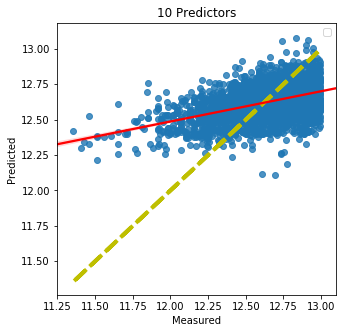

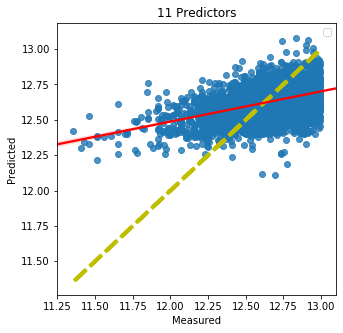

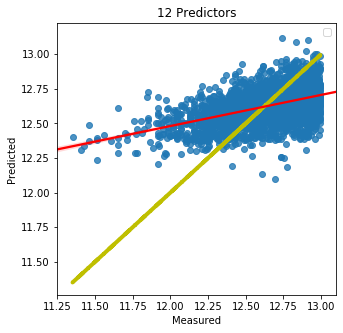

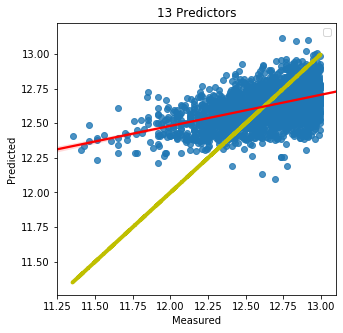

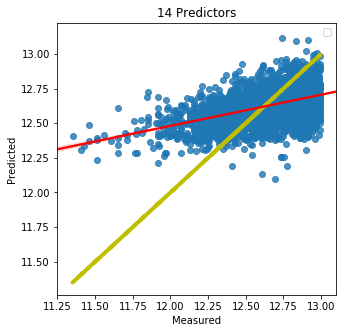

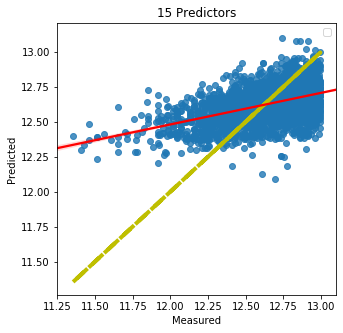

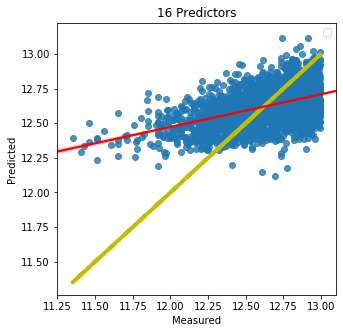

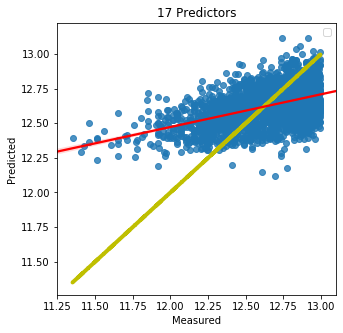

# Predictors  R-squared  MSE % Difference  Added Predictor
0              1   0.076001         -4.768876      [bathrooms]
1              2   0.127246         -4.065290         [viewed]
2              3   0.156065         -4.270255          [grade]
3              4   0.181760         -4.309963     [waterfront]
4              5   0.189031         -4.140620       [basement]
5              6   0.195861         -4.287810         [floors]
6              7   0.200470         -4.028106      [condition]
7              8   0.205445         -3.820207           [view]
8              9   0.207971         -3.825068            [age]
9             10   0.208830         -3.849410       [sqft_lot]
10            11   0.210833         -3.541979       [bedrooms]
11            12   0.214030         -3.095786    [sqft_living]
12            13   0.216662         -2.789553     [sqft_above]
13            14   0.216640         -2.783334     [sqft_lot15]
14            15   0.216492         -2.533299  [sqft_basement]
15            16   0.223238         -2.234546  [sqft_living15]
16            17   0.222895         -2.197282   [yr_renovated]

In [66]:
#RFE regression of all predictors using repeated k-fold 

#setting X, y and creating train/test split
X = df_s2.drop(['price', 'price_log'], axis=1)
y = df_s2.price_log
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=47)

#initializing counter variable 'i' and creating lists to add to over each iteration
i = 1
results_df_s2 = pd.DataFrame()
predictors = list()
reg_score = list()
mse_diffs = list()
added_pred = list()
previous_columns = []

#this loop repeats once for each column in 'df'
while i <= (int(len(df_s2.drop(['price', 'price_log'], axis=1).columns))):
    rkf = RepeatedKFold(n_splits=3, n_repeats=10, random_state=47)
    scores = 0
    percent_diffs = 0
    
    #this loop using a repeated k-fold to generate an average R-squared and % difference in train/test MSE 
    for train_index, test_index in rkf.split(X_train):
        X_train2, X_val = X_train.iloc[train_index], X_train.iloc[test_index]
        y_train2, y_val = y_train.iloc[train_index], y_train.iloc[test_index]
        linreg = LinearRegression()
        selector = RFE(linreg, n_features_to_select = i)
        selector = selector.fit(X_train2, y_train2) 
        selected_columns = X_train2.columns[selector.support_ ]
        linreg.fit(X_train2[selected_columns],y_train2)
        scores = scores + linreg.score(X_test[selected_columns], y_test)
        y_hat_train = linreg.predict(X_train[selected_columns])
        y_hat_test = linreg.predict(X_test[selected_columns])
        train_mse = mean_squared_error(y_train, y_hat_train)
        test_mse = mean_squared_error(y_test, y_hat_test)
        mse_diff = test_mse - train_mse
        percent_diff = mse_diff/train_mse
        percent_diffs += percent_diff
        
    #adding data to lists
    predictors.append(i)
    reg_score.append(scores/30)
    mse_diffs.append(percent_diffs/30*100)
    added_pred.append(list(set(selected_columns) - set(previous_columns)))
    previous_columns = selected_columns
    predicted = linreg.predict(X_test[selected_columns])

    fig, ax = plt.subplots(figsize=(5,5))
    #ax.scatter(y_test, predicted, edgecolors=(0, 0, 0))
    ax.plot(y_test, y_test, 'k--', lw=4, color='y')
    sns.regplot(x=y_test, y=predicted, ax=ax, line_kws={"color": "red"})
    ax.set_xlabel('Measured')
    ax.set_ylabel('Predicted')
    ax.set_title(str(i) + " Predictors")
    ax.legend()
    i += 1
results_df_s2['# Predictors'] = predictors
results_df_s2['R-squared'] = reg_score
results_df_s2['MSE % Difference'] = mse_diffs
results_df_s2['Added Predictor'] = added_pred
plt.show()
results_df_s2

In [67]:
df_s3 = df[df.price >= 440000]

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


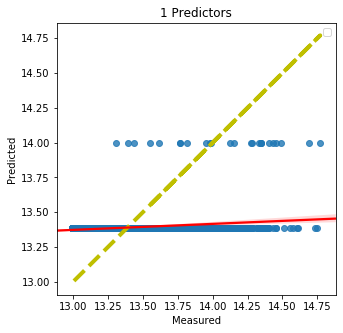

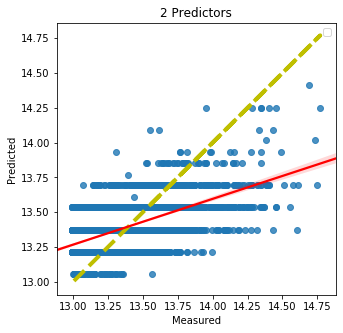

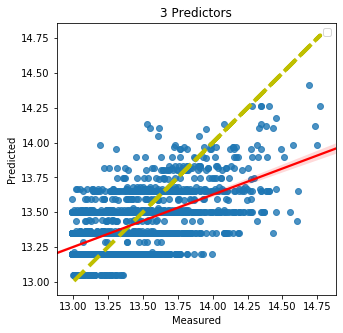

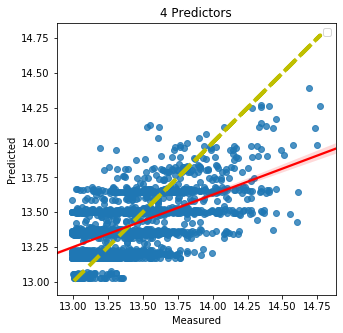

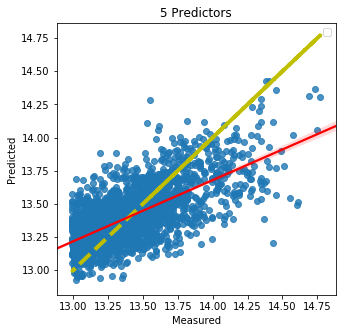

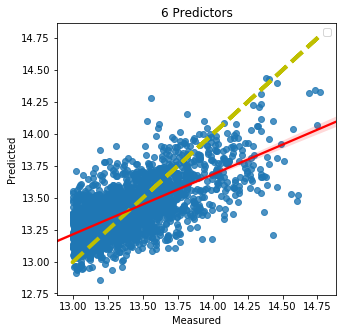

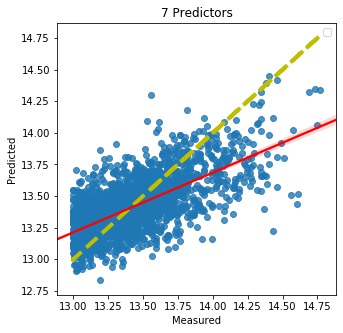

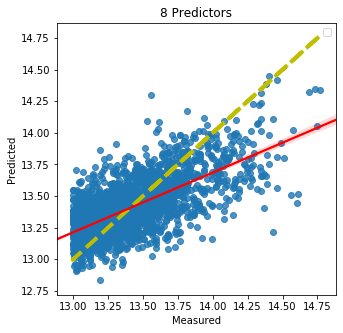

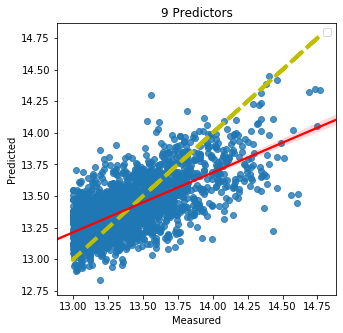

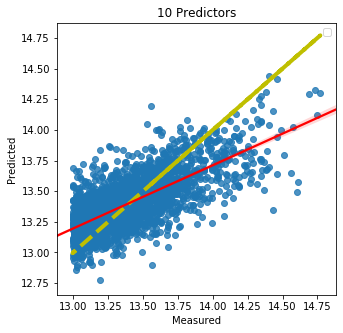

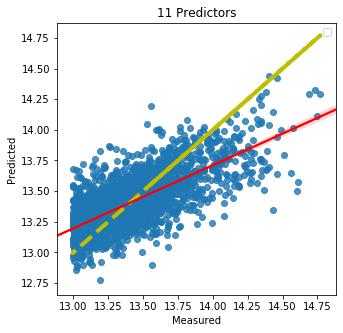

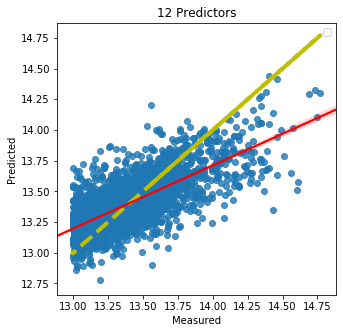

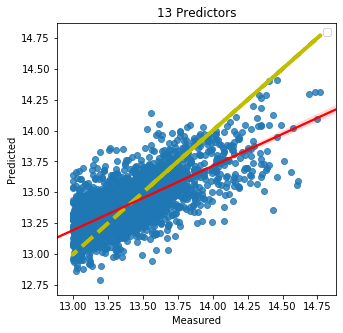

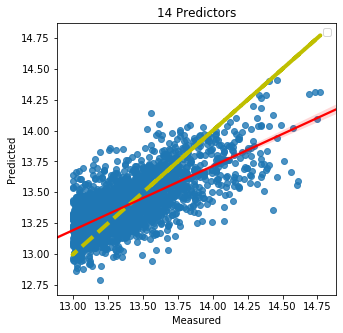

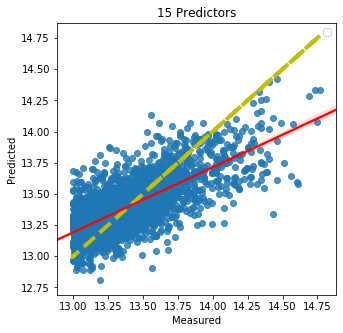

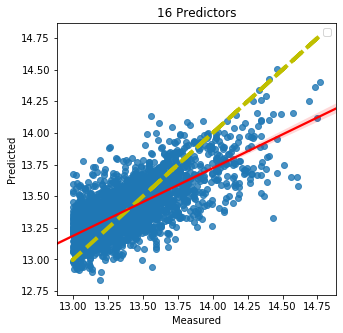

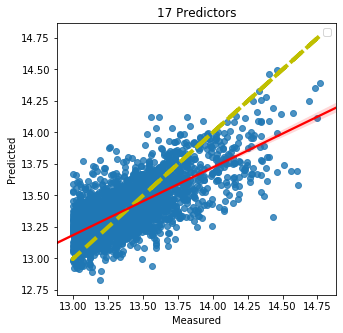

# Predictors  R-squared  MSE % Difference  Added Predictor
0              1   0.046828         -2.856566     [waterfront]
1              2   0.326432         -3.298947          [grade]
2              3   0.365909         -3.383069           [view]
3              4   0.371022         -2.879090      [bathrooms]
4              5   0.440569         -3.596222            [age]
5              6   0.454360         -3.789706      [condition]
6              7   0.457782         -3.758151     [sqft_lot15]
7              8   0.464461         -3.940624       [basement]
8              9   0.474467         -4.252127       [sqft_lot]
9             10   0.495179         -5.125408     [sqft_above]
10            11   0.505169         -5.518740         [viewed]
11            12   0.513762         -5.810980       [bedrooms]
12            13   0.516166         -5.945644    [sqft_living]
13            14   0.516958         -5.955271         [floors]
14            15   0.518272         -5.587980  [sqft_basement]
15            16   0.526553         -5.403242  [sqft_living15]
16            17   0.530526         -5.923348   [yr_renovated]

In [68]:
#RFE regression of all predictors using repeated k-fold 

#setting X, y and creating train/test split
X = df_s3.drop(['price', 'price_log'], axis=1)
y = df_s3.price_log
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=47)

#initializing counter variable 'i' and creating lists to add to over each iteration
i = 1
results_df_s3 = pd.DataFrame()
predictors = list()
reg_score = list()
mse_diffs = list()
added_pred = list()
previous_columns = []

#this loop repeats once for each column in 'df'
while i <= (int(len(df_s3.drop(['price', 'price_log'], axis=1).columns))):
    rkf = RepeatedKFold(n_splits=3, n_repeats=10, random_state=47)
    scores = 0
    percent_diffs = 0
    
    #this loop using a repeated k-fold to generate an average R-squared and % difference in train/test MSE 
    for train_index, test_index in rkf.split(X_train):
        X_train2, X_val = X_train.iloc[train_index], X_train.iloc[test_index]
        y_train2, y_val = y_train.iloc[train_index], y_train.iloc[test_index]
        linreg = LinearRegression()
        selector = RFE(linreg, n_features_to_select = i)
        selector = selector.fit(X_train2, y_train2) 
        selected_columns = X_train2.columns[selector.support_ ]
        linreg.fit(X_train2[selected_columns],y_train2)
        scores = scores + linreg.score(X_test[selected_columns], y_test)
        y_hat_train = linreg.predict(X_train[selected_columns])
        y_hat_test = linreg.predict(X_test[selected_columns])
        train_mse = mean_squared_error(y_train, y_hat_train)
        test_mse = mean_squared_error(y_test, y_hat_test)
        mse_diff = test_mse - train_mse
        percent_diff = mse_diff/train_mse
        percent_diffs += percent_diff
        
    #adding data to lists
    predictors.append(i)
    reg_score.append(scores/30)
    mse_diffs.append(percent_diffs/30*100)
    added_pred.append(list(set(selected_columns) - set(previous_columns)))
    previous_columns = selected_columns
    predicted = linreg.predict(X_test[selected_columns])

    fig, ax = plt.subplots(figsize=(5,5))
    #ax.scatter(y_test, predicted, edgecolors=(0, 0, 0))
    ax.plot(y_test, y_test, 'k--', lw=4, color='y')
    sns.regplot(x=y_test, y=predicted, ax=ax, line_kws={"color": "red"})
    ax.set_xlabel('Measured')
    ax.set_ylabel('Predicted')
    ax.set_title(str(i) + " Predictors") 
    ax.legend()
    i += 1
results_df_s3['# Predictors'] = predictors
results_df_s3['R-squared'] = reg_score
results_df_s3['MSE % Difference'] = mse_diffs
results_df_s3['Added Predictor'] = added_pred
plt.show()
results_df_s3

#### Although choosing a subset where 'price' is greater than or equal to 615,000 gave the best result out of these experiments. All of them perform worse than our original model and signify that it is best we include the full range of home prices.


## Interpreting the Data

#### In this final section we will use our model to draw conclusions about the data and its real-world applications.

#### We will look at the coefficients of our regression model. Since our dependent variable 'price' was log transformed, we will reverse that transformation for each of the coefficients in order to be able to talk about them in terms of real-life values. We will also sort the coefficients in descending order to rank the significance of each predictor.

In [70]:
#creates a dataframe of both log transformed and non-log transformed coefficients of predictors in model
X = df.drop(['price', 'price_log'], axis=1)
y = df.price_log
model_reg = LinearRegression()
linreg.fit(X, y)
model_coef = pd.DataFrame()
preds = list()
coef_log = list()
coef = list()
sum_coef = 0
percent_coef = list()
i = 0
for col in X.columns:
    preds.append(X.columns.values[i])
    coef_log.append(linreg.coef_[i])
    coef.append(10**(linreg.coef_[i]))
    sum_coef += 10**(linreg.coef_[i])
    i += 1
model_coef['Predictor'] = preds
model_coef['Coefficient(log)'] = coef_log
model_coef['Coefficient'] = coef
for c in model_coef.Coefficient:
    percent_coef.append(c/sum_coef*100)
model_coef['Contribution(%)'] = percent_coef
model_coef.sort_values(by=['Coefficient'], ascending=False)

Predictor  Coefficient(log)  Coefficient  Contribution(%)
5      waterfront          0.400170     2.512872        12.661660
8           grade          0.192811     1.558873         7.854728
14       basement          0.082538     1.209310         6.093378
4          floors          0.078084     1.196973         6.031212
1       bathrooms          0.067054     1.166954         5.879954
15            age          0.064526     1.160182         5.845833
7       condition          0.050389     1.123023         5.658600
16         viewed          0.043601     1.105606         5.570842
6            view          0.029136     1.069390         5.388360
2     sqft_living          0.012926     1.030210         5.190940
9      sqft_above          0.004070     1.009416         5.086166
12  sqft_living15          0.000150     1.000345         5.040462
11   yr_renovated          0.000032     1.000074         5.039095
10  sqft_basement          0.000011     1.000026         5.038851
0        bedrooms         -0.034403     0.923841         4.654980
3        sqft_lot         -0.041172     0.909553         4.582984
13     sqft_lot15         -0.060652     0.869656         4.381955

#### From the above table we can see the relative impact of each predictor with 'waterfront' being the most significant and 'sqft_lot15' being the least signficant. This tells us that a home having a waterfront view has the greatest impact on the price of the home while the square footage of the lot a home sits on has the least impact on the home price. The grade of the home, whether or not the home has a basement, and the number of floors are the next most impactful factors. It is interesting that bedrooms is so low on the list as one would usually think that homes with more bedrooms cost more. This is likely because the number of bedrooms can be arbitrary in a home. Two homes with the same square footage could have differing numbers of bedrooms and perhaps having larger but smaller rooms is more appealing to home buyers.

#### Running one final test on our model, using an OLS regression this time, we can check the p-values of each of our variables to make sure none of them are higher than 0.05 which would invalidate them being in our model

In [71]:
outcome = 'price'
predictors = df.drop(['price', 'price_log'], axis=1)
pred_sum = "+".join(predictors.columns)
formula = outcome + "~" + pred_sum
model = ols(formula=formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.598
Model:                            OLS   Adj. R-squared:                  0.598
Method:                 Least Squares   F-statistic:                     1800.
Date:                Thu, 09 Apr 2020   Prob (F-statistic):               0.00
Time:                        18:57:57   Log-Likelihood:            -2.7750e+05
No. Observations:               20587   AIC:                         5.550e+05
Df Residuals:                   20569   BIC:                         5.552e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      -7.23e+05   2.26e+04    -32.042      0.000   -7.67e+05   -6.79e+05
bedrooms      -1.821e+04   1847.657     -9.857      0.000   -2.18e+04   -1.46e+04
bathrooms      1.425e+04   5555.921      2.566      0.010    3364.286    2.51e+04
sqft_living   -8005.6144   1370.702     -5.841      0.000   -1.07e+04   -5318.930
sqft_lot      -2.585e+04   3830.851     -6.748      0.000   -3.34e+04   -1.83e+04
floors          2.93e+04   3585.926      8.172      0.000    2.23e+04    3.63e+04
waterfront     3.985e+05   1.89e+04     21.080      0.000    3.61e+05    4.36e+05
view            5.34e+04   4928.857     10.834      0.000    4.37e+04    6.31e+04
condition      2.708e+04   2062.370     13.130      0.000     2.3e+04    3.11e+04
grade           1.11e+05   1903.138     58.301      0.000    1.07e+05    1.15e+05
sqft_above     1.646e+04   1316.574     12.503      0.000    1.39e+04     1.9e+04
sqft_basement   174.4103     14.822     11.767      0.000     145.357     203.464
yr_renovated     27.2543      3.543      7.692      0.000      20.309      34.200
sqft_living15    85.9531      3.249     26.453      0.000      79.584      92.322
sqft_lot15    -2.839e+04   4034.078     -7.037      0.000   -3.63e+04   -2.05e+04
basement       3.005e+04   4778.213      6.288      0.000    2.07e+04    3.94e+04
age            3.666e+04    773.458     47.398      0.000    3.51e+04    3.82e+04
viewed         -3.32e+04   1.19e+04     -2.795      0.005   -5.65e+04   -9917.970
==============================================================================
Omnibus:                     7818.700   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            69347.959
Skew:                           1.580   Prob(JB):                         0.00
Kurtosis:                      11.418   Cond. No.                     3.86e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.86e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### From our OLS regression we can see that the p-value is less than the threshold of 0.05 for each of our variables, thus allowing us to reject the null hypothesis and keep all of the predictors in our model as they are highly like to be significant.

## Conclusion

#### In this project we followed the OSEMiN framework in order to build a predictive model about home sale prices in King County, Washington. Through scrubbing and transforming the data, we built a moderately well fitted model and used that model to view the contribution of each predictor to the price of a home. Our model was not a perfect fit and further investigation using different transformations and more advanced regression methods would likely produce a more robust, well-fitted model. The model could also be improved by having more data on higher priced homes as the dataset having many outliers likely worsened the fit of the regression.